<h3><strong>Import Libraries</strong></h3>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Change Pandas Display Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  

<h3><strong>Read and Verify CSV</strong></h3>

In [44]:
# Read CSV
df = pd.read_csv('battles.csv', nrows=10000)

# Print first five lines of CSV
print(df.head())

   Unnamed: 0                 battleTime    arena.id  gameMode.id  average.startingTrophies  winner.tag  winner.startingTrophies  winner.trophyChange  winner.crowns  winner.kingTowerHitPoints winner.princessTowersHitPoints winner.clan.tag  winner.clan.badgeId   loser.tag  loser.startingTrophies  loser.trophyChange  loser.crowns  loser.kingTowerHitPoints loser.clan.tag  loser.clan.badgeId loser.princessTowersHitPoints  tournamentTag  winner.card1.id  winner.card1.level  winner.card2.id  winner.card2.level  winner.card3.id  winner.card3.level  winner.card4.id  winner.card4.level  winner.card5.id  winner.card5.level  winner.card6.id  winner.card6.level  winner.card7.id  winner.card7.level  winner.card8.id  winner.card8.level                                  winner.cards.list  winner.totalcard.level  winner.troop.count  winner.structure.count  winner.spell.count  winner.common.count  winner.rare.count  winner.epic.count  winner.legendary.count  winner.elixir.average  loser.card1.id  \
0   

<h3><strong>Data Cleaning & Initial Inspection</strong></h3>

In [45]:
# Shape of Dataframe
print(df.shape)

(10000, 74)


In [46]:
# All Columns in Dataframe
cols = df.columns.tolist()
print(cols)

['Unnamed: 0', 'battleTime', 'arena.id', 'gameMode.id', 'average.startingTrophies', 'winner.tag', 'winner.startingTrophies', 'winner.trophyChange', 'winner.crowns', 'winner.kingTowerHitPoints', 'winner.princessTowersHitPoints', 'winner.clan.tag', 'winner.clan.badgeId', 'loser.tag', 'loser.startingTrophies', 'loser.trophyChange', 'loser.crowns', 'loser.kingTowerHitPoints', 'loser.clan.tag', 'loser.clan.badgeId', 'loser.princessTowersHitPoints', 'tournamentTag', 'winner.card1.id', 'winner.card1.level', 'winner.card2.id', 'winner.card2.level', 'winner.card3.id', 'winner.card3.level', 'winner.card4.id', 'winner.card4.level', 'winner.card5.id', 'winner.card5.level', 'winner.card6.id', 'winner.card6.level', 'winner.card7.id', 'winner.card7.level', 'winner.card8.id', 'winner.card8.level', 'winner.cards.list', 'winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count',

In [47]:
# Print Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns
print(numerical_cols)

Index(['Unnamed: 0', 'arena.id', 'gameMode.id', 'average.startingTrophies', 'winner.startingTrophies', 'winner.trophyChange', 'winner.crowns', 'winner.kingTowerHitPoints', 'winner.clan.badgeId', 'loser.startingTrophies', 'loser.trophyChange', 'loser.crowns', 'loser.kingTowerHitPoints', 'loser.clan.badgeId', 'tournamentTag', 'winner.card1.id', 'winner.card1.level', 'winner.card2.id', 'winner.card2.level', 'winner.card3.id', 'winner.card3.level', 'winner.card4.id', 'winner.card4.level', 'winner.card5.id', 'winner.card5.level', 'winner.card6.id', 'winner.card6.level', 'winner.card7.id', 'winner.card7.level', 'winner.card8.id', 'winner.card8.level', 'winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count', 'winner.elixir.average', 'loser.card1.id', 'loser.card1.level', 'loser.card2.id', 'loser.card2.level', 'loser.card3.id', 'loser.card3.level',
       'loser.car

In [48]:
# Print Data Types of Each Column
print(df.dtypes)

Unnamed: 0                          int64
battleTime                         object
arena.id                          float64
gameMode.id                       float64
average.startingTrophies          float64
winner.tag                         object
winner.startingTrophies           float64
winner.trophyChange               float64
winner.crowns                     float64
winner.kingTowerHitPoints         float64
winner.princessTowersHitPoints     object
winner.clan.tag                    object
winner.clan.badgeId               float64
loser.tag                          object
loser.startingTrophies            float64
loser.trophyChange                float64
loser.crowns                      float64
loser.kingTowerHitPoints          float64
loser.clan.tag                     object
loser.clan.badgeId                float64
loser.princessTowersHitPoints      object
tournamentTag                     float64
winner.card1.id                     int64
winner.card1.level                

In [49]:
# Null Values
print(df.isnull().sum())

Unnamed: 0                            0
battleTime                            0
arena.id                              0
gameMode.id                           0
average.startingTrophies              0
winner.tag                            0
winner.startingTrophies               0
winner.trophyChange                   0
winner.crowns                         0
winner.kingTowerHitPoints             0
winner.princessTowersHitPoints      168
winner.clan.tag                      92
winner.clan.badgeId                  92
loser.tag                             0
loser.startingTrophies                0
loser.trophyChange                    0
loser.crowns                          0
loser.kingTowerHitPoints           2711
loser.clan.tag                      545
loser.clan.badgeId                  545
loser.princessTowersHitPoints      4983
tournamentTag                     10000
winner.card1.id                       0
winner.card1.level                    0
winner.card2.id                       0


In [50]:
# Print Number of Unique Values
print(df.nunique())

Unnamed: 0                        10000
battleTime                         8003
arena.id                              9
gameMode.id                           2
average.startingTrophies           4299
winner.tag                         3496
winner.startingTrophies            2834
winner.trophyChange                  23
winner.crowns                         3
winner.kingTowerHitPoints          1752
winner.princessTowersHitPoints     7975
winner.clan.tag                     344
winner.clan.badgeId                 118
loser.tag                          9462
loser.startingTrophies             2837
loser.trophyChange                   33
loser.crowns                          3
loser.kingTowerHitPoints           2249
loser.clan.tag                     8280
loser.clan.badgeId                  180
loser.princessTowersHitPoints      1850
tournamentTag                         0
winner.card1.id                     102
winner.card1.level                    9
winner.card2.id                     102


<h5>Handling Null Values & Dropping Uninfluential Columns</h5>

In [51]:
# Dropping Columns (Columns with not mutch meaning/influence)
df = df.drop(columns=['Unnamed: 0', 'winner.tag', 'winner.clan.tag', 'winner.clan.badgeId', 'loser.tag', 'loser.clan.tag', 'loser.clan.badgeId', 'tournamentTag' ])

In [52]:
# Resolving Null Values to 0
df['winner.princessTowersHitPoints'] = df['winner.princessTowersHitPoints'].fillna(0)
df['loser.kingTowerHitPoints'] = df['loser.kingTowerHitPoints'].fillna(0)
df['loser.princessTowersHitPoints'] = df['loser.princessTowersHitPoints'].fillna(0)

In [53]:
# Reason we are able to resolve null values to 0

# Only appears when loser crowns is 2 which means that both winner and loser princess towers are destroyed (0 hitpoints)
print('Winner Princess Tower Hit Points to Loser Crowns:')
print(df.groupby(df['winner.princessTowersHitPoints'].isna())['loser.crowns'].describe())

# Null values appear when winner crowns is 3, which means that the king tower was destroyed (0 hit points)
print('\nLoser King Tower Hit Points to Winner Crowns:')
print(df.groupby(df['loser.kingTowerHitPoints'].isna())['winner.crowns'].describe())

# # Null values appear only when both princess towers are destroyed (0 hit points)
print('\nLoser Princess Tower Hit Points to Winner Crowns:')
print(df.groupby(df['loser.princessTowersHitPoints'].isna())['winner.crowns'].describe())

Winner Princess Tower Hit Points to Loser Crowns:
                                  count    mean       std  min  25%  50%  75%  max
winner.princessTowersHitPoints                                                    
False                           10000.0  0.2992  0.493258  0.0  0.0  0.0  1.0  2.0

Loser King Tower Hit Points to Winner Crowns:
                            count    mean       std  min  25%  50%  75%  max
loser.kingTowerHitPoints                                                    
False                     10000.0  1.7694  0.848349  1.0  1.0  1.0  3.0  3.0

Loser Princess Tower Hit Points to Winner Crowns:
                                 count    mean       std  min  25%  50%  75%  max
loser.princessTowersHitPoints                                                    
False                          10000.0  1.7694  0.848349  1.0  1.0  1.0  3.0  3.0


In [54]:
# Check for null values again
print(df.isnull().sum())

battleTime                        0
arena.id                          0
gameMode.id                       0
average.startingTrophies          0
winner.startingTrophies           0
winner.trophyChange               0
winner.crowns                     0
winner.kingTowerHitPoints         0
winner.princessTowersHitPoints    0
loser.startingTrophies            0
loser.trophyChange                0
loser.crowns                      0
loser.kingTowerHitPoints          0
loser.princessTowersHitPoints     0
winner.card1.id                   0
winner.card1.level                0
winner.card2.id                   0
winner.card2.level                0
winner.card3.id                   0
winner.card3.level                0
winner.card4.id                   0
winner.card4.level                0
winner.card5.id                   0
winner.card5.level                0
winner.card6.id                   0
winner.card6.level                0
winner.card7.id                   0
winner.card7.level          

<h3><strong>Exploratory Data Analysis</strong></h3>

In [55]:
# Summary Statistics
print(df.describe())

           arena.id   gameMode.id  average.startingTrophies  winner.startingTrophies  winner.trophyChange  winner.crowns  winner.kingTowerHitPoints  loser.startingTrophies  loser.trophyChange  loser.crowns  loser.kingTowerHitPoints  winner.card1.id  winner.card1.level  winner.card2.id  winner.card2.level  winner.card3.id  winner.card3.level  winner.card4.id  winner.card4.level  winner.card5.id  winner.card5.level  winner.card6.id  winner.card6.level  winner.card7.id  winner.card7.level  winner.card8.id  winner.card8.level  winner.totalcard.level  winner.troop.count  winner.structure.count  winner.spell.count  winner.common.count  winner.rare.count  winner.epic.count  winner.legendary.count  winner.elixir.average  loser.card1.id  loser.card1.level  loser.card2.id  loser.card2.level  loser.card3.id  loser.card3.level  loser.card4.id  loser.card4.level  loser.card5.id  loser.card5.level  loser.card6.id  loser.card6.level  loser.card7.id  loser.card7.level  loser.card8.id  \
count  1.00000

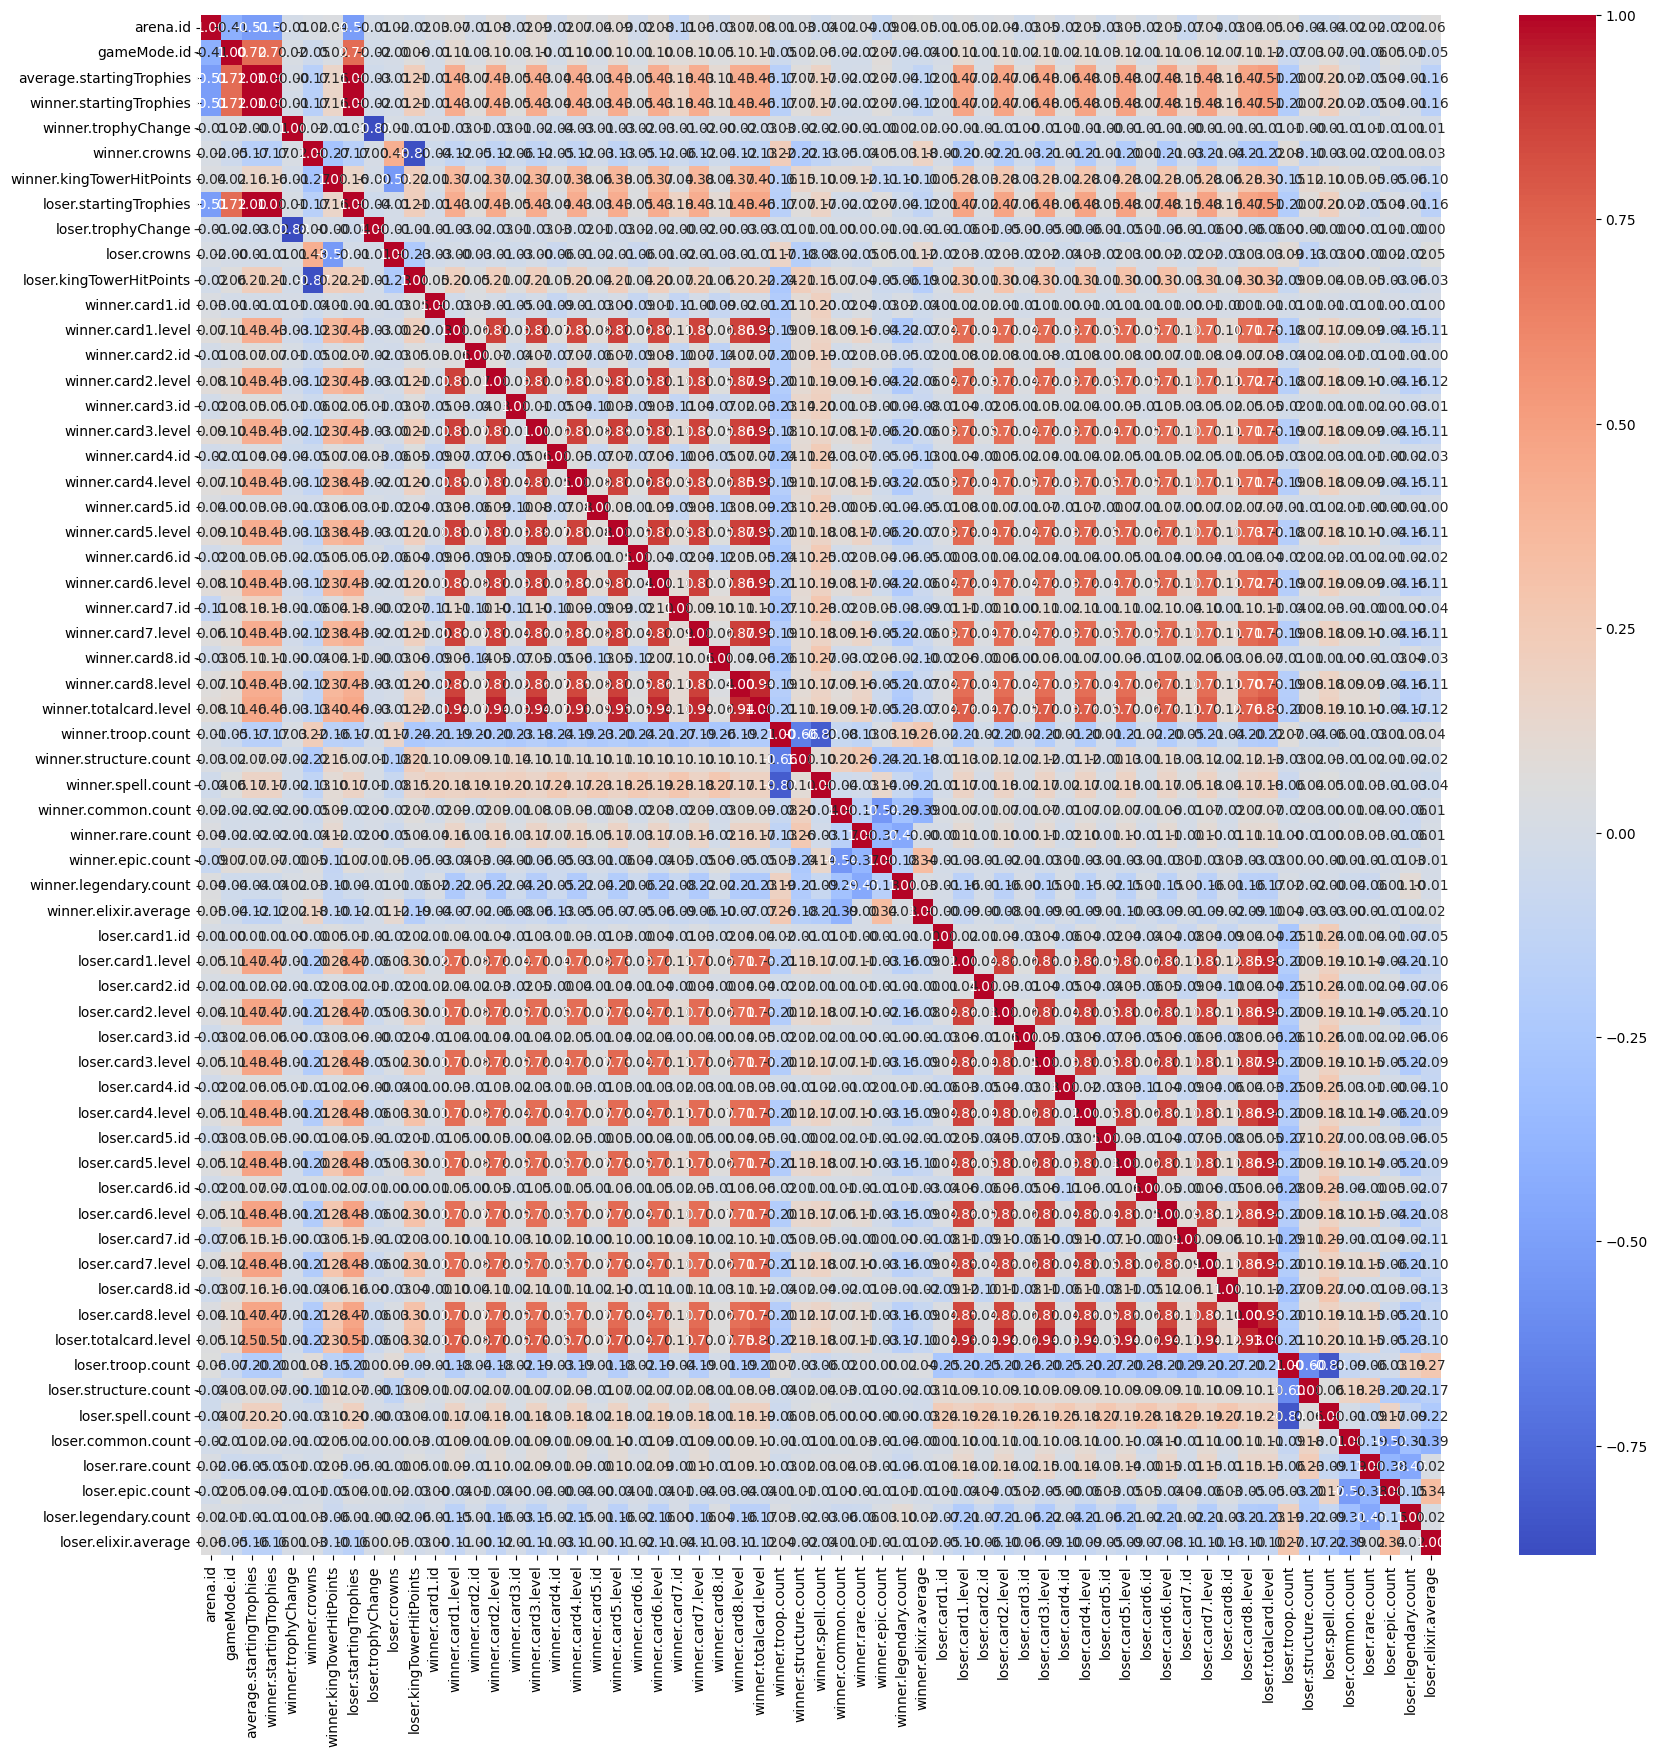

In [56]:
# Correlation Heatmap (How much does one variable affect the other)
plt.figure(figsize=(20, 20))
co_mtx = df.corr(numeric_only=True)
sns.heatmap(co_mtx, cmap='coolwarm', fmt='.2f', annot=True)
plt.show()

  winner.card1.id   winner.card2.id   winner.card3.id winner.card4.id winner.card5.id winner.card6.id   winner.card7.id winner.card8.id loser.card1.id loser.card2.id    loser.card3.id loser.card4.id   loser.card5.id loser.card6.id loser.card7.id   loser.card8.id
0      Battle Ram  Barbarian Barrel       Royal Ghost          Hunter     Cannon Cart     Heal Spirit  Elite Barbarians    Magic Archer  Goblin Barrel    Goblin Gang          Princess     Ice Spirit           Knight        The Log         Rocket            Tesla
1    Minion Horde     Skeleton Army  Elite Barbarians     Royal Giant          Wizard             Zap          Fireball         The Log         Bomber          Witch             Giant         Wizard    Goblin Barrel         Knight         Mirror         Valkyrie
2       P.E.K.K.A    Electro Wizard            Poison      Battle Ram     Royal Ghost    Magic Archer               Zap          Bandit    Goblin Gang       Princess  Barbarian Barrel  Inferno Tower       Ice Sp

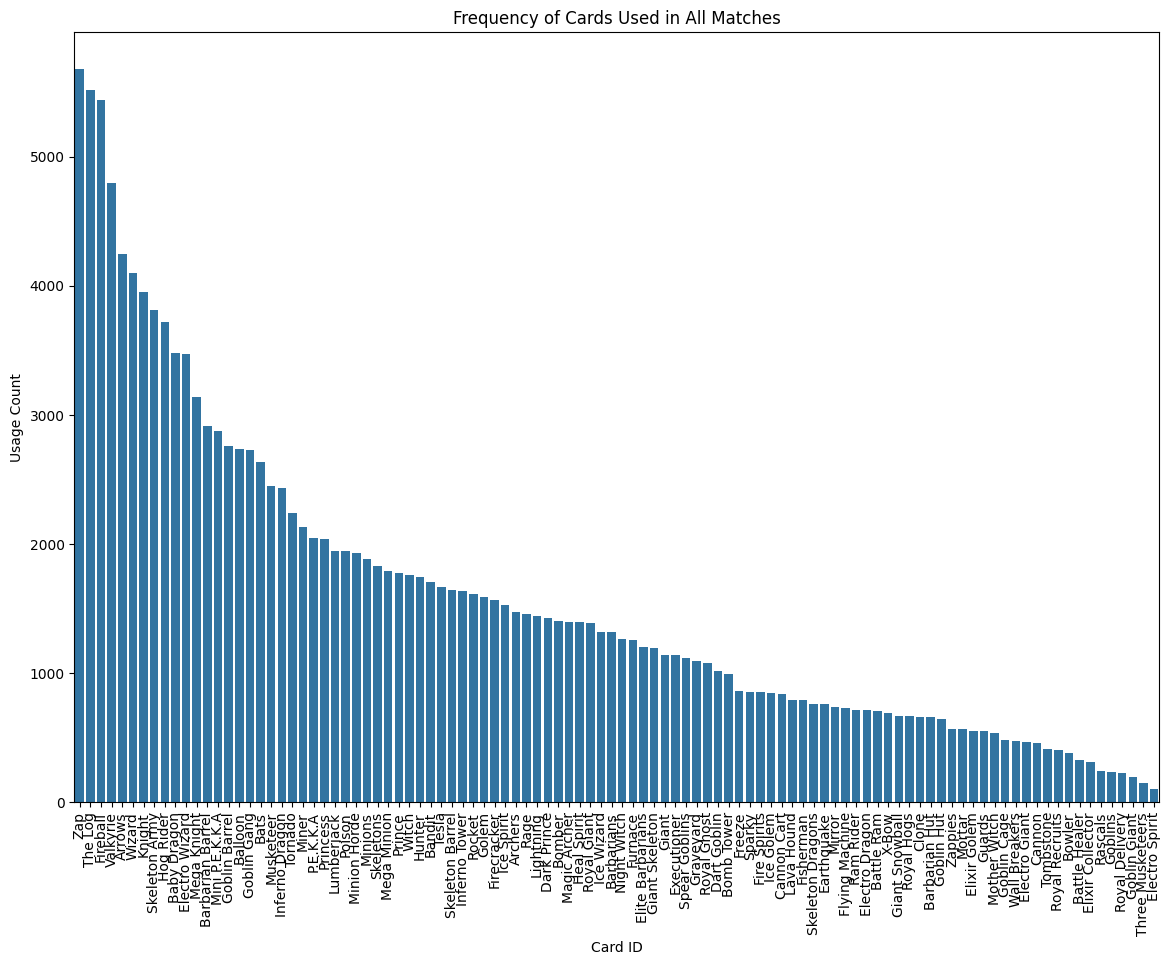

In [57]:
card_map = {
    26000000: "Knight", 26000001: "Archers", 26000002: "Goblins", 26000003: "Giant",
    26000004: "P.E.K.K.A", 26000005: "Minions", 26000006: "Balloon", 26000007: "Witch",
    26000008: "Barbarians", 26000009: "Golem", 26000010: "Skeletons", 26000011: "Valkyrie",
    26000012: "Skeleton Army", 26000013: "Bomber", 26000014: "Musketeer", 26000015: "Baby Dragon",
    26000016: "Prince", 26000017: "Wizard", 26000018: "Mini P.E.K.K.A", 26000019: "Spear Goblins",
    26000020: "Giant Skeleton", 26000021: "Hog Rider", 26000022: "Minion Horde", 26000023: "Ice Wizard",
    26000024: "Royal Giant", 26000025: "Guards", 26000026: "Princess", 26000027: "Dark Prince",
    26000028: "Three Musketeers", 26000029: "Lava Hound", 26000030: "Ice Spirit", 26000031: "Fire Spirits",
    26000032: "Miner", 26000033: "Sparky", 26000034: "Bowler", 26000035: "Lumberjack", 26000036: "Battle Ram",
    26000037: "Inferno Dragon", 26000038: "Ice Golem", 26000039: "Mega Minion", 26000040: "Dart Goblin",
    26000041: "Goblin Gang", 26000042: "Electro Wizard", 26000043: "Elite Barbarians", 26000044: "Hunter",
    26000045: "Executioner", 26000046: "Bandit", 26000047: "Royal Recruits", 26000048: "Night Witch",
    26000049: "Bats", 26000050: "Royal Ghost", 26000051: "Ram Rider", 26000052: "Zappies",
    26000053: "Rascals", 26000054: "Cannon Cart", 26000055: "Mega Knight", 26000056: "Skeleton Barrel",
    26000057: "Flying Machine", 26000058: "Wall Breakers", 26000059: "Royal Hogs", 26000060: "Goblin Giant",
    26000061: "Fisherman", 26000062: "Magic Archer", 26000063: "Electro Dragon", 26000064: "Firecracker",
    26000067: "Elixir Golem", 26000068: "Battle Healer", 26000080: "Skeleton Dragons", 26000083: "Mother Witch",
    26000084: "Electro Spirit", 26000085: "Electro Giant", 27000000: "Cannon", 27000001: "Goblin Hut",
    27000002: "Mortar", 27000003: "Inferno Tower", 27000004: "Bomb Tower", 27000005: "Barbarian Hut",
    27000006: "Tesla", 27000007: "Elixir Collector", 27000008: "X-Bow", 27000009: "Tombstone",
    27000010: "Furnace", 27000012: "Goblin Cage", 28000000: "Fireball", 28000001: "Arrows",
    28000002: "Rage", 28000003: "Rocket", 28000004: "Goblin Barrel", 28000005: "Freeze",
    28000006: "Mirror", 28000007: "Lightning", 28000008: "Zap", 28000009: "Poison",
    28000010: "Graveyard", 28000011: "The Log", 28000012: "Tornado", 28000013: "Clone",
    28000014: "Earthquake", 28000015: "Barbarian Barrel", 28000016: "Heal Spirit",
    28000017: "Giant Snowball", 28000018: "Royal Delivery"
}

# Bar Plot of Cards used the most
card_cols = [
    'winner.card1.id', 'winner.card2.id', 'winner.card3.id', 'winner.card4.id',
    'winner.card5.id', 'winner.card6.id', 'winner.card7.id', 'winner.card8.id',
    'loser.card1.id', 'loser.card2.id', 'loser.card3.id', 'loser.card4.id',
    'loser.card5.id', 'loser.card6.id', 'loser.card7.id', 'loser.card8.id'
]

for col in card_cols:
    df[col] = df[col].map(card_map)

# Check first few replacements
print(df[card_cols].head())

all_cards = df[card_cols].values.flatten()
card_counts = pd.Series(all_cards).value_counts()


plt.figure(figsize=(14, 10))
sns.barplot(x=card_counts.index, y=card_counts.values)
plt.title("Frequency of Cards Used in All Matches")
plt.xlabel("Card ID")
plt.ylabel("Usage Count")
plt.xticks(rotation=90)
plt.show()


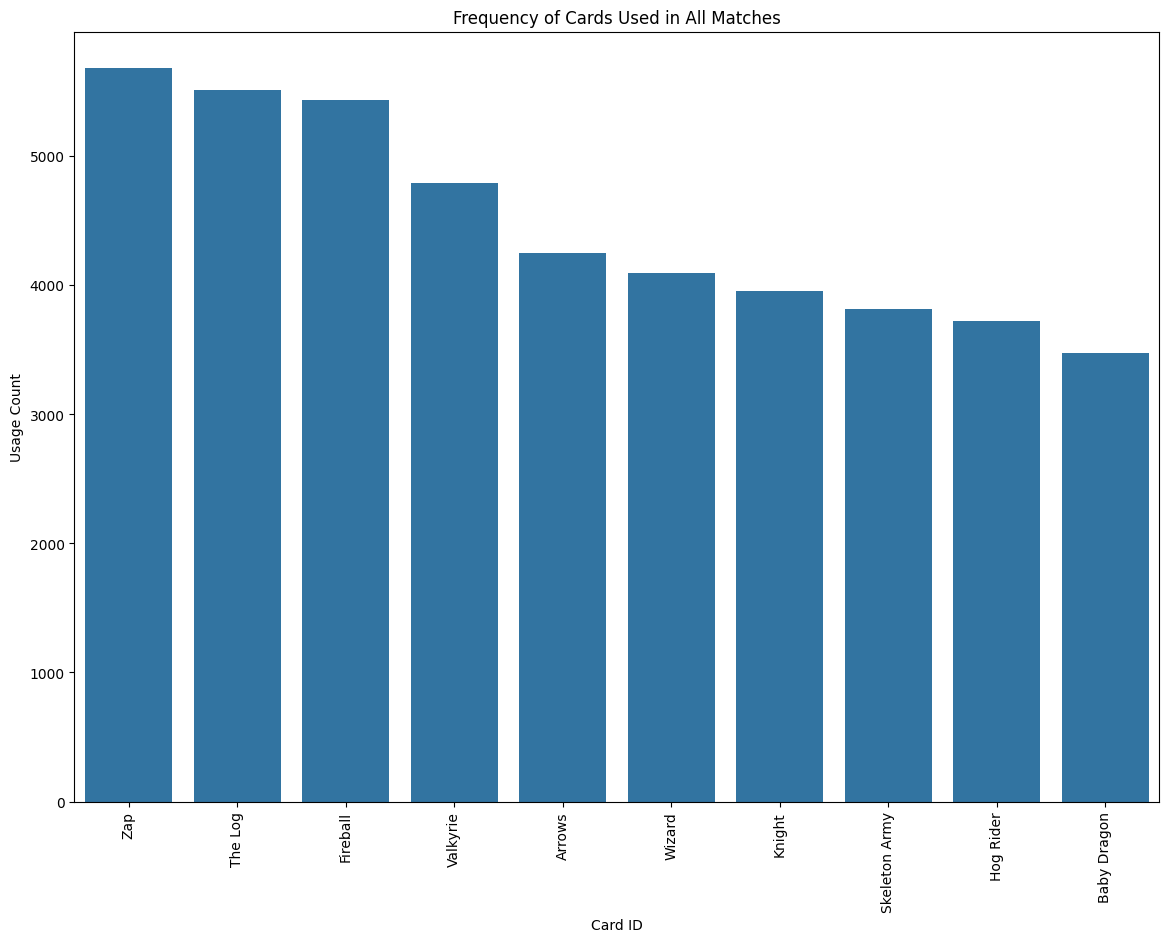

In [58]:
# Show the ten most used cards
top10 = card_counts.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(x=top10.index, y=top10.values)
plt.title("Frequency of Cards Used in All Matches")
plt.xlabel("Card ID")
plt.ylabel("Usage Count")
plt.xticks(rotation=90)
plt.show()

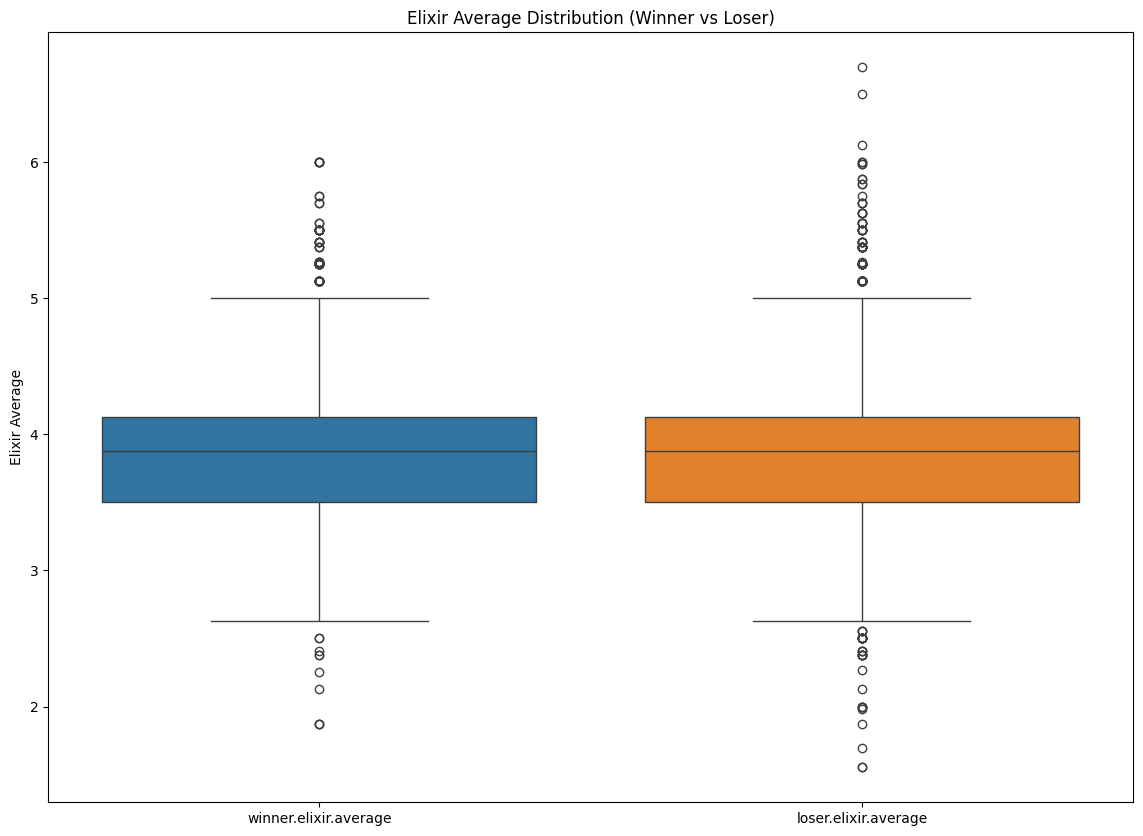

In [59]:
# Histogram of Winner Elixir Average vs Loser Elixir Average
plt.figure(figsize=(14, 10))
sns.boxplot(data=df[['winner.elixir.average', 'loser.elixir.average']])
plt.title("Elixir Average Distribution (Winner vs Loser)")
plt.ylabel("Elixir Average")
plt.show()

# Shows that elixir average alone doesn't determine match outcomes

<h3><strong>Data Prep for Model Building</strong></h3>

<h5>Creating a new dataframe with winning and losing cards in different rows and if the deck won (won = 0 or 1)</h5>

<h5>Creating a new dataframe which includes winning and losing cards from each match on the same row and which deck won (won = 0 or 1)</h5>

<h3><strong>Model Building</strong> (not sure what model to use right now)</h3>

<h5>Predicting overall win rate of one deck</h5>

<h5>Predicting overall win rate of deck A vs deck B</h5>